<a href="https://colab.research.google.com/github/kumaranu7/Bank-Customers-Behaviour-Study-using-neural-networks/blob/master/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf

In [0]:
import keras

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

geography = pd.get_dummies(X['Geography'],drop_first=True)
gender = pd.get_dummies(X['Gender'],drop_first=True)

X = pd.concat([X, geography, gender], axis = 1)
X = X.drop(['Geography','Gender'], axis = 1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [29]:
X_train.shape

(8000, 11)

In [30]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [0]:
 classifier = Sequential()

In [33]:
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform', activation = 'relu', input_dim = 11))

In [0]:
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform', activation = 'relu'))

In [0]:
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

In [36]:
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 6)                 72        
_________________________________________________________________
dense_7 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [37]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [38]:
model_history =  classifier.fit(X_train, y_train, validation_split = 0.33, batch_size = 10, nb_epoch = 100)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.





Train on 5359 samples, validate on 2641 samples
Epoch 1/100





5359/5359 [==============================] - 1s 268us/step - loss: 0.5734 - acc: 0.7477 - val_loss: 0.5133 - val_acc: 0.8012
Epoch 2/100
5359/5359 [==============================] - 1s 135us/step - loss: 0.4794 - acc: 0.8063 - val_loss: 0.4705 - val_acc: 0.8073
Epoch 3/100
5359/5359 [==============================] - 1s 152us/step - loss: 0.4462 - acc: 0.8181 - val_loss: 0.4520 - val_acc: 0.8129
Epoch 4/100
5359/5359 [==============================] - 1s 147us/step - loss: 0.4329 - acc: 0.8255 - val_loss: 0.4424 - val_acc: 0.8133
Epoch 5/100
5359/5359 [==============================] - 1s 149us/step - loss: 0.4259 - acc: 0.8291 - val_loss: 0.4354 - val_acc: 0.8171
Epoch 6/100
5359/5359 [==============================] - 1s 144us/step - loss: 0.4201 - acc: 0.8304 - val_loss: 0.4296 - val_acc: 0.8190
Epoch 7/100
5359/5359 [==============================] - 1s 144us/step - loss: 0.4141 - acc: 0.8345 - val_loss: 0.4234 - v

In [0]:
predictions = classifier.predict(X_test)
y_pred = (predictions>0.5)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [40]:
cm

array([[1515,   80],
       [ 198,  207]])

In [0]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)

In [42]:
score

0.861

In [43]:
print(model_history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


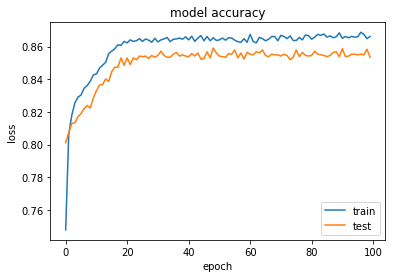

In [48]:
plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc = 'lower right')
plt.show()